<a href="https://colab.research.google.com/github/Muralimannam/FMML_COURSE_ASSESSMENTS/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [2]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [4]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [6]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [7]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [8]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [9]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [10]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [11]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [12]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

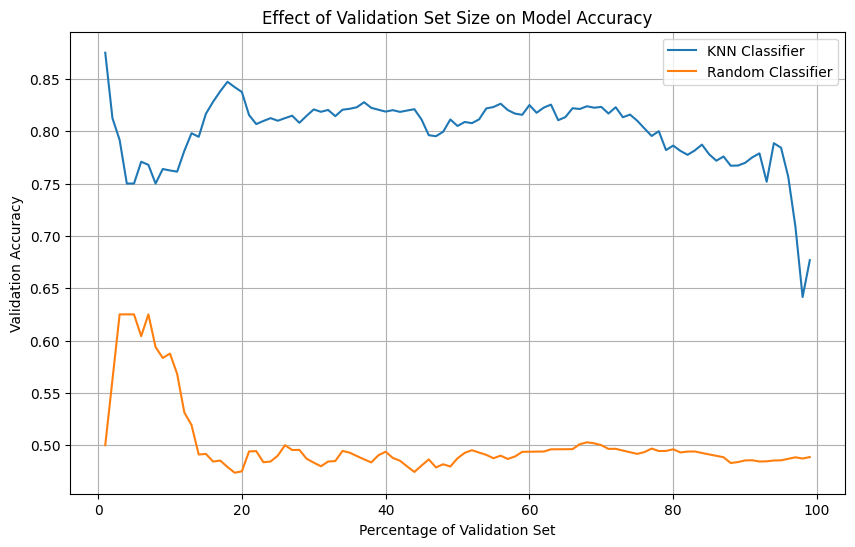

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Define the percentage of validation set to vary
validation_percentages = np.arange(1, 100, 1)

# Initialize lists to store accuracy results
knn_accuracies = []
random_accuracies = []

# Define the constant test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate through different validation percentages
for validation_percentage in validation_percentages:
    # Split the remaining data into train and validation sets
    train_size = 1 - (validation_percentage / 100)
    X_train_partial, X_val, y_train_partial, y_val = train_test_split(
        X_train, y_train, train_size=train_size, random_state=42
    )

    # Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_partial, y_train_partial)
    knn_val_accuracy = accuracy_score(y_val, knn.predict(X_val))
    knn_accuracies.append(knn_val_accuracy)

    random_classifier = DummyClassifier(strategy="uniform", random_state=42)
    random_classifier.fit(X_train_partial, y_train_partial)
    random_val_accuracy = accuracy_score(y_val, random_classifier.predict(X_val))
    random_accuracies.append(random_val_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(validation_percentages, knn_accuracies, label="KNN Classifier")
plt.plot(validation_percentages, random_accuracies, label="Random Classifier")
plt.xlabel("Percentage of Validation Set")
plt.ylabel("Validation Accuracy")
plt.title("Effect of Validation Set Size on Model Accuracy")
plt.legend()
plt.grid(True)
plt.show()


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [13]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [14]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


#**1.Does averaging the validation accuracy across multiple splits give more consistent results?**
Randomness in Data Split: When you split your dataset into training and validation sets, the specific data points in each split can affect the performance metrics you calculate. Some random splits might be easier or harder for the model, leading to variability in the reported accuracy. By averaging results over multiple splits, you reduce the impact of this randomness.

Bias and Variance Estimation: Cross-validation allows you to estimate both bias and variance in your model. If your model performs consistently well across different splits, it indicates low bias and stable generalization. On the other hand, if performance varies widely, it suggests high variance and potential overfitting.

Better Generalization Assessment: Averaging results from multiple splits provides a more realistic estimate of your model's generalization performance. It helps you assess how well your model is likely to perform on unseen data, which is the ultimate goal of machine learning.


#**2.Does it give more accurate estimate of test accuracy?**
Reduces Variance: When you use a single train-test split, the performance metric (e.g., accuracy) can vary significantly depending on the specific data points in the split. This variation might not accurately represent the model's true generalization performance. Cross-validation mitigates this issue by averaging results over multiple splits, reducing the variance in your performance estimate.

Better Use of Data: Cross-validation allows you to use all your data for both training and testing in a systematic way. In k-fold cross-validation, you train and test the model k times, each time using a different subset of data for testing. This ensures that every data point is used for testing exactly once and for training multiple times, leading to a more comprehensive assessment of your model's performance.

Bias and Variance Assessment: Cross-validation not only provides an estimate of the model's generalization performance but also helps you assess whether your model suffers from issues like bias (underfitting) or variance (overfitting). By analyzing the performance across different folds, you can identify whether the model consistently underperforms or exhibits high variability.

#**3.What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?**
1.Fewer Iterations (Smaller k):

When you use a smaller number of iterations (e.g., k=5 or k=10), each fold represents a larger portion of your dataset. This can lead to a more stable estimate since each fold has more data.
However, with fewer iterations, you might have more bias in your estimate because each fold's test set is less representative of the entire dataset.
Smaller values of k can be computationally faster, which is advantageous when you have a large dataset or complex models.

2.More Iterations (Larger k):

Increasing the number of iterations (e.g., k=20, k=30) results in smaller test sets in each fold, making each test set more representative of the overall data distribution.
A higher number of iterations can provide a more accurate estimate of model performance because it reduces bias in the estimate. The estimate becomes less dependent on the specific data split.
However, with more iterations, cross-validation can be computationally more expensive, especially for large datasets or complex models.

#**4.Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?**
1.Stability: With more iterations, each fold's test set becomes smaller but still potentially more representative of the data. This added stability can reduce the risk of having one or two particularly unrepresentative data splits affecting your estimate.

2.Better Assessment of Model Variance: More iterations can provide a more reliable assessment of your model's variance (its sensitivity to different data subsets). If your model's performance varies widely across different folds, it suggests that your model might be overfitting or underfitting.

Limitations:

3.Limited Data: If your original dataset is very small to begin with, increasing the number of iterations in cross-validation doesn't magically generate more data. You are still limited by the amount of data you have for training and testing.

4.Increased Computational Cost: Using more iterations means running your model multiple times, which can be computationally expensive. This can be a concern if you have limited computational resources.

5.Risk of Overfitting: With an extremely small dataset, increasing the number of iterations can lead to each fold having an even smaller training set. This can increase the risk of overfitting because your model may have difficulty learning meaningful patterns from very little data.

This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?
